In [1]:
# Import Neccessary Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\us953\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('HR_Analytics.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# Relocating the target value.
y = df['Attrition']
df.drop('Attrition', axis=1, inplace=True)
df['Attrition'] = y

# Exploratory Data Analysis

In [4]:
# checking missing values
df.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [5]:
# checking duplicated columns
df.duplicated().sum()

0

In [6]:
# Size of dataset.
df.shape

(1470, 35)

##### This dataset contains 1470 rows and 35 columns, out of which one column represents the target variable and the remaining columns are independent variables.

In [7]:
# Number of columns present in this dataset.
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [8]:
# Dropping unnecessary columns.
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [9]:
# Checking the data type of columns.
df.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [10]:
# checking unique values of columns.
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

Attrition
No     1233
Yes     237
Name: count, dtype: int64

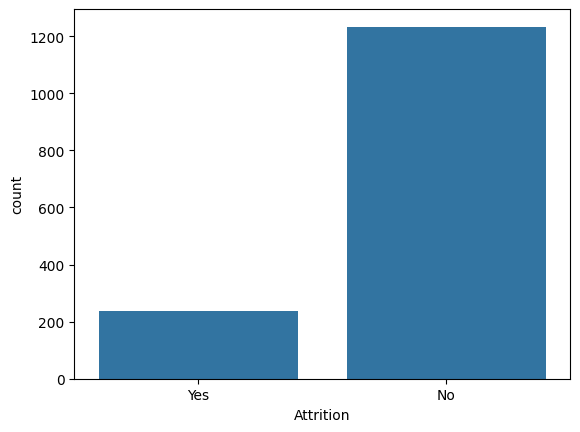

In [11]:
ax = sns.countplot(x= 'Attrition', data=df)
df['Attrition'].value_counts()

In [12]:
# As we can see, there is a significant difference between 'Yes' and 'No', indicating a 
# class imbalance that can be addressed using oversampling methods.

### Data Distribution:

#### Plot histograms and box plots for numeric features.
#### Use bar charts for categorical features.

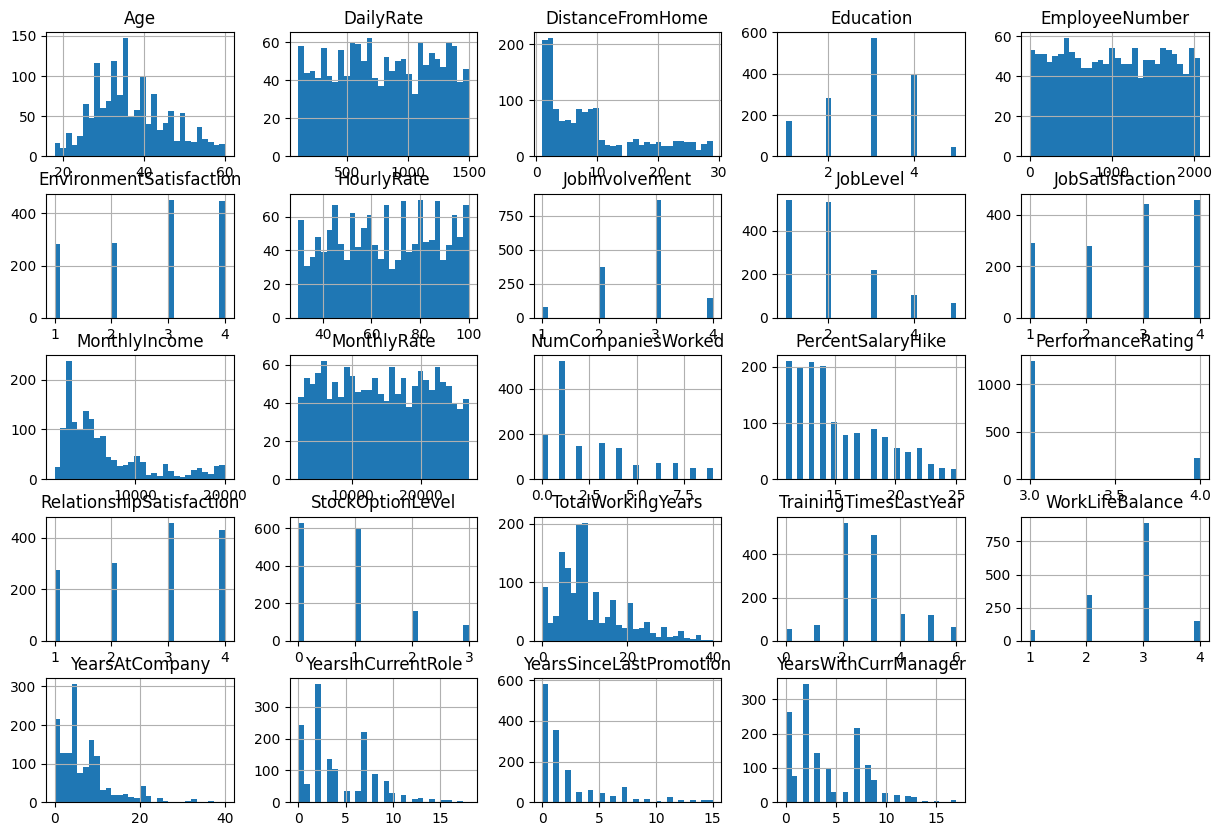

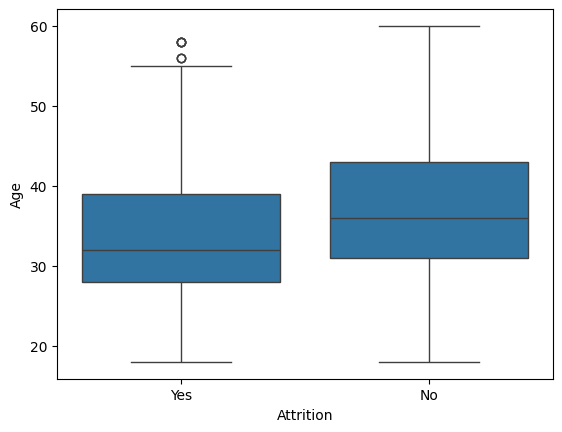

In [13]:
# Histograms for numeric features
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Box plots
sns.boxplot(x='Attrition', y='Age', data=df)
plt.show()

# Categorical Data Analysis:

#### Analyze distributions of categorical variables and their relationship with attrition.

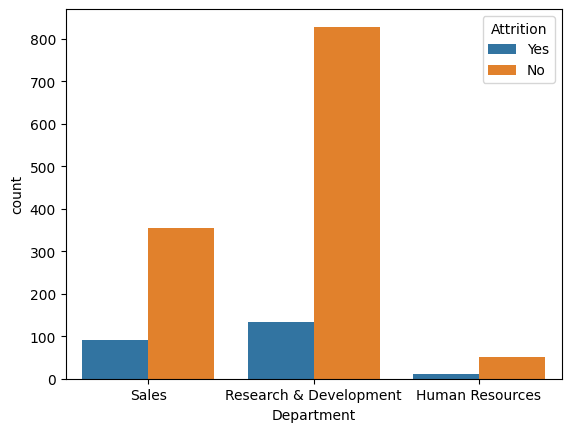

In [14]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.show()

In [15]:
# getting summary description of dataset.
df.describe()['MonthlyIncome']

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

#### Count indicates the number of non-null values present. If the mean is greater than the median (50th percentile), it suggests that the dataset is positively skewed. Let's examine this step by step. Also outliers are present in this dataset.

# Encoding categorial columns using OrdinalEncodes

In [16]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

#### Checking outliers

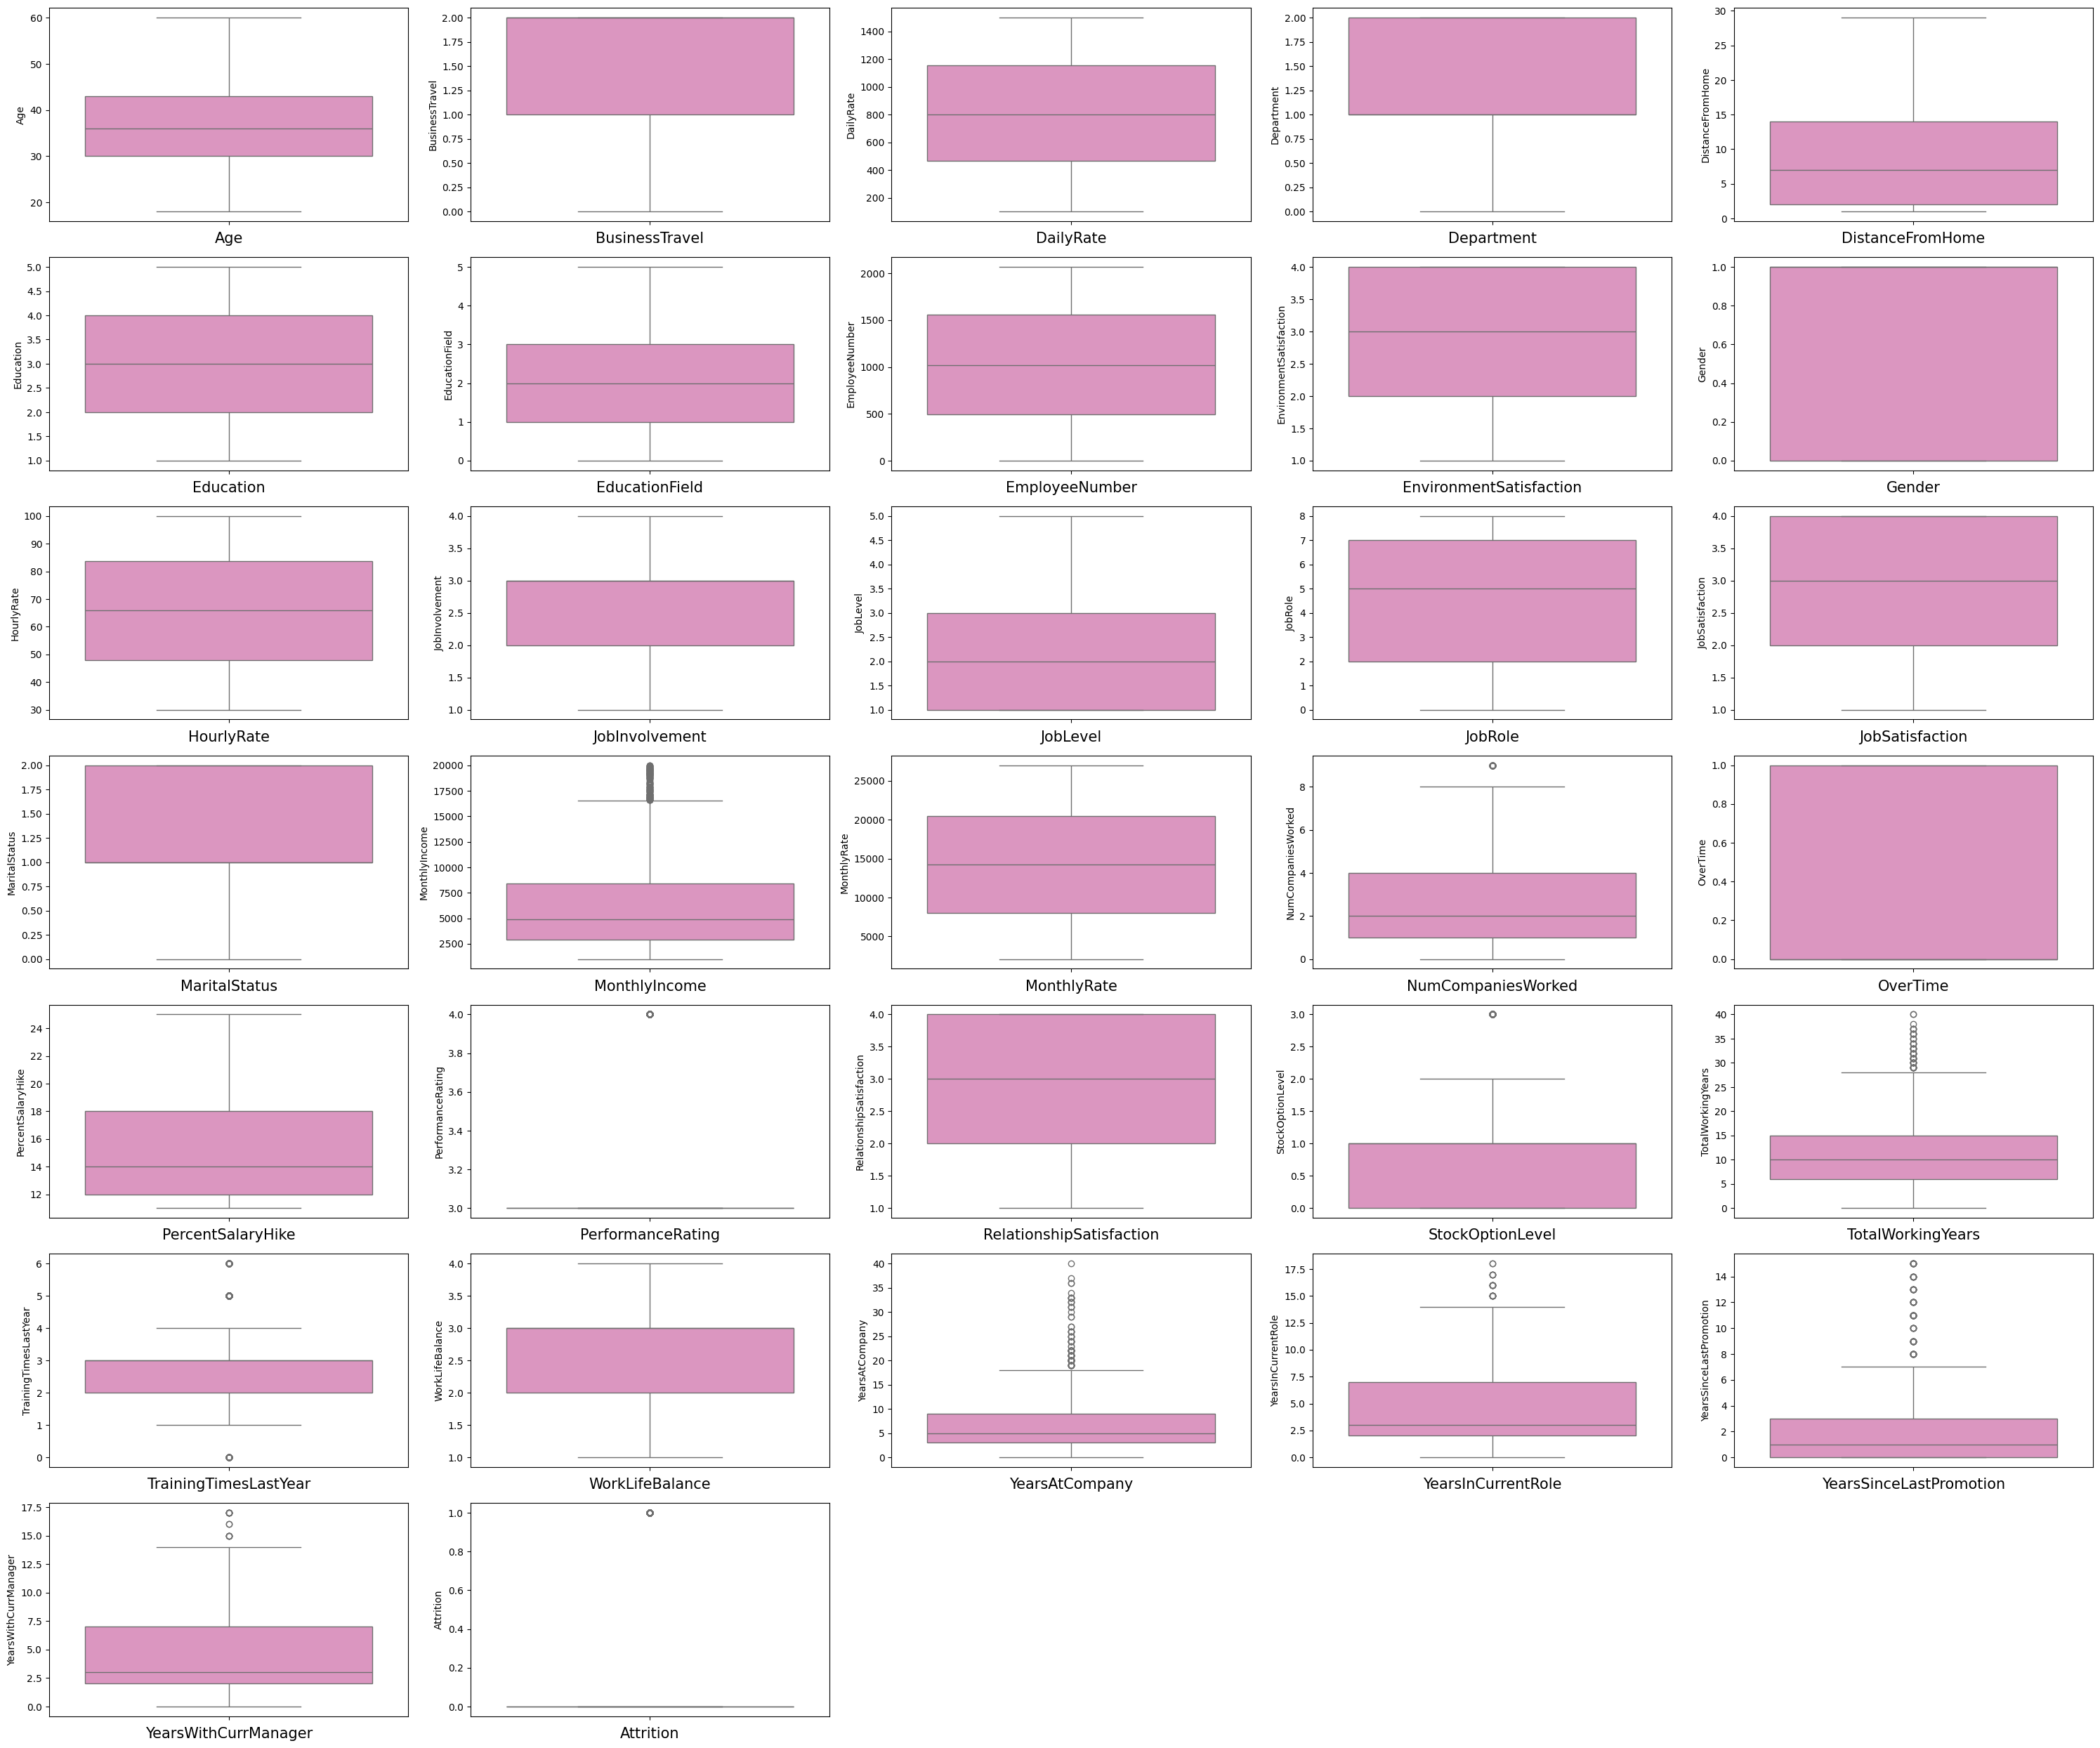

In [17]:
# Before removing outliers.
plt.figure(figsize=(30,25), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=35:
        ax = plt.subplot(7,5,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [18]:
# As we can see there are outliear present in this dataset.

# Remove or Transform Outliers:

### Based on the context, you can either remove or apply transformations.

In [19]:
outlier_col = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
    
# Removing outliers
for col in outlier_col:
    df = df[(df[col] < df[col].quantile(0.95)) & (df[col] > df[col].quantile(0.05))]


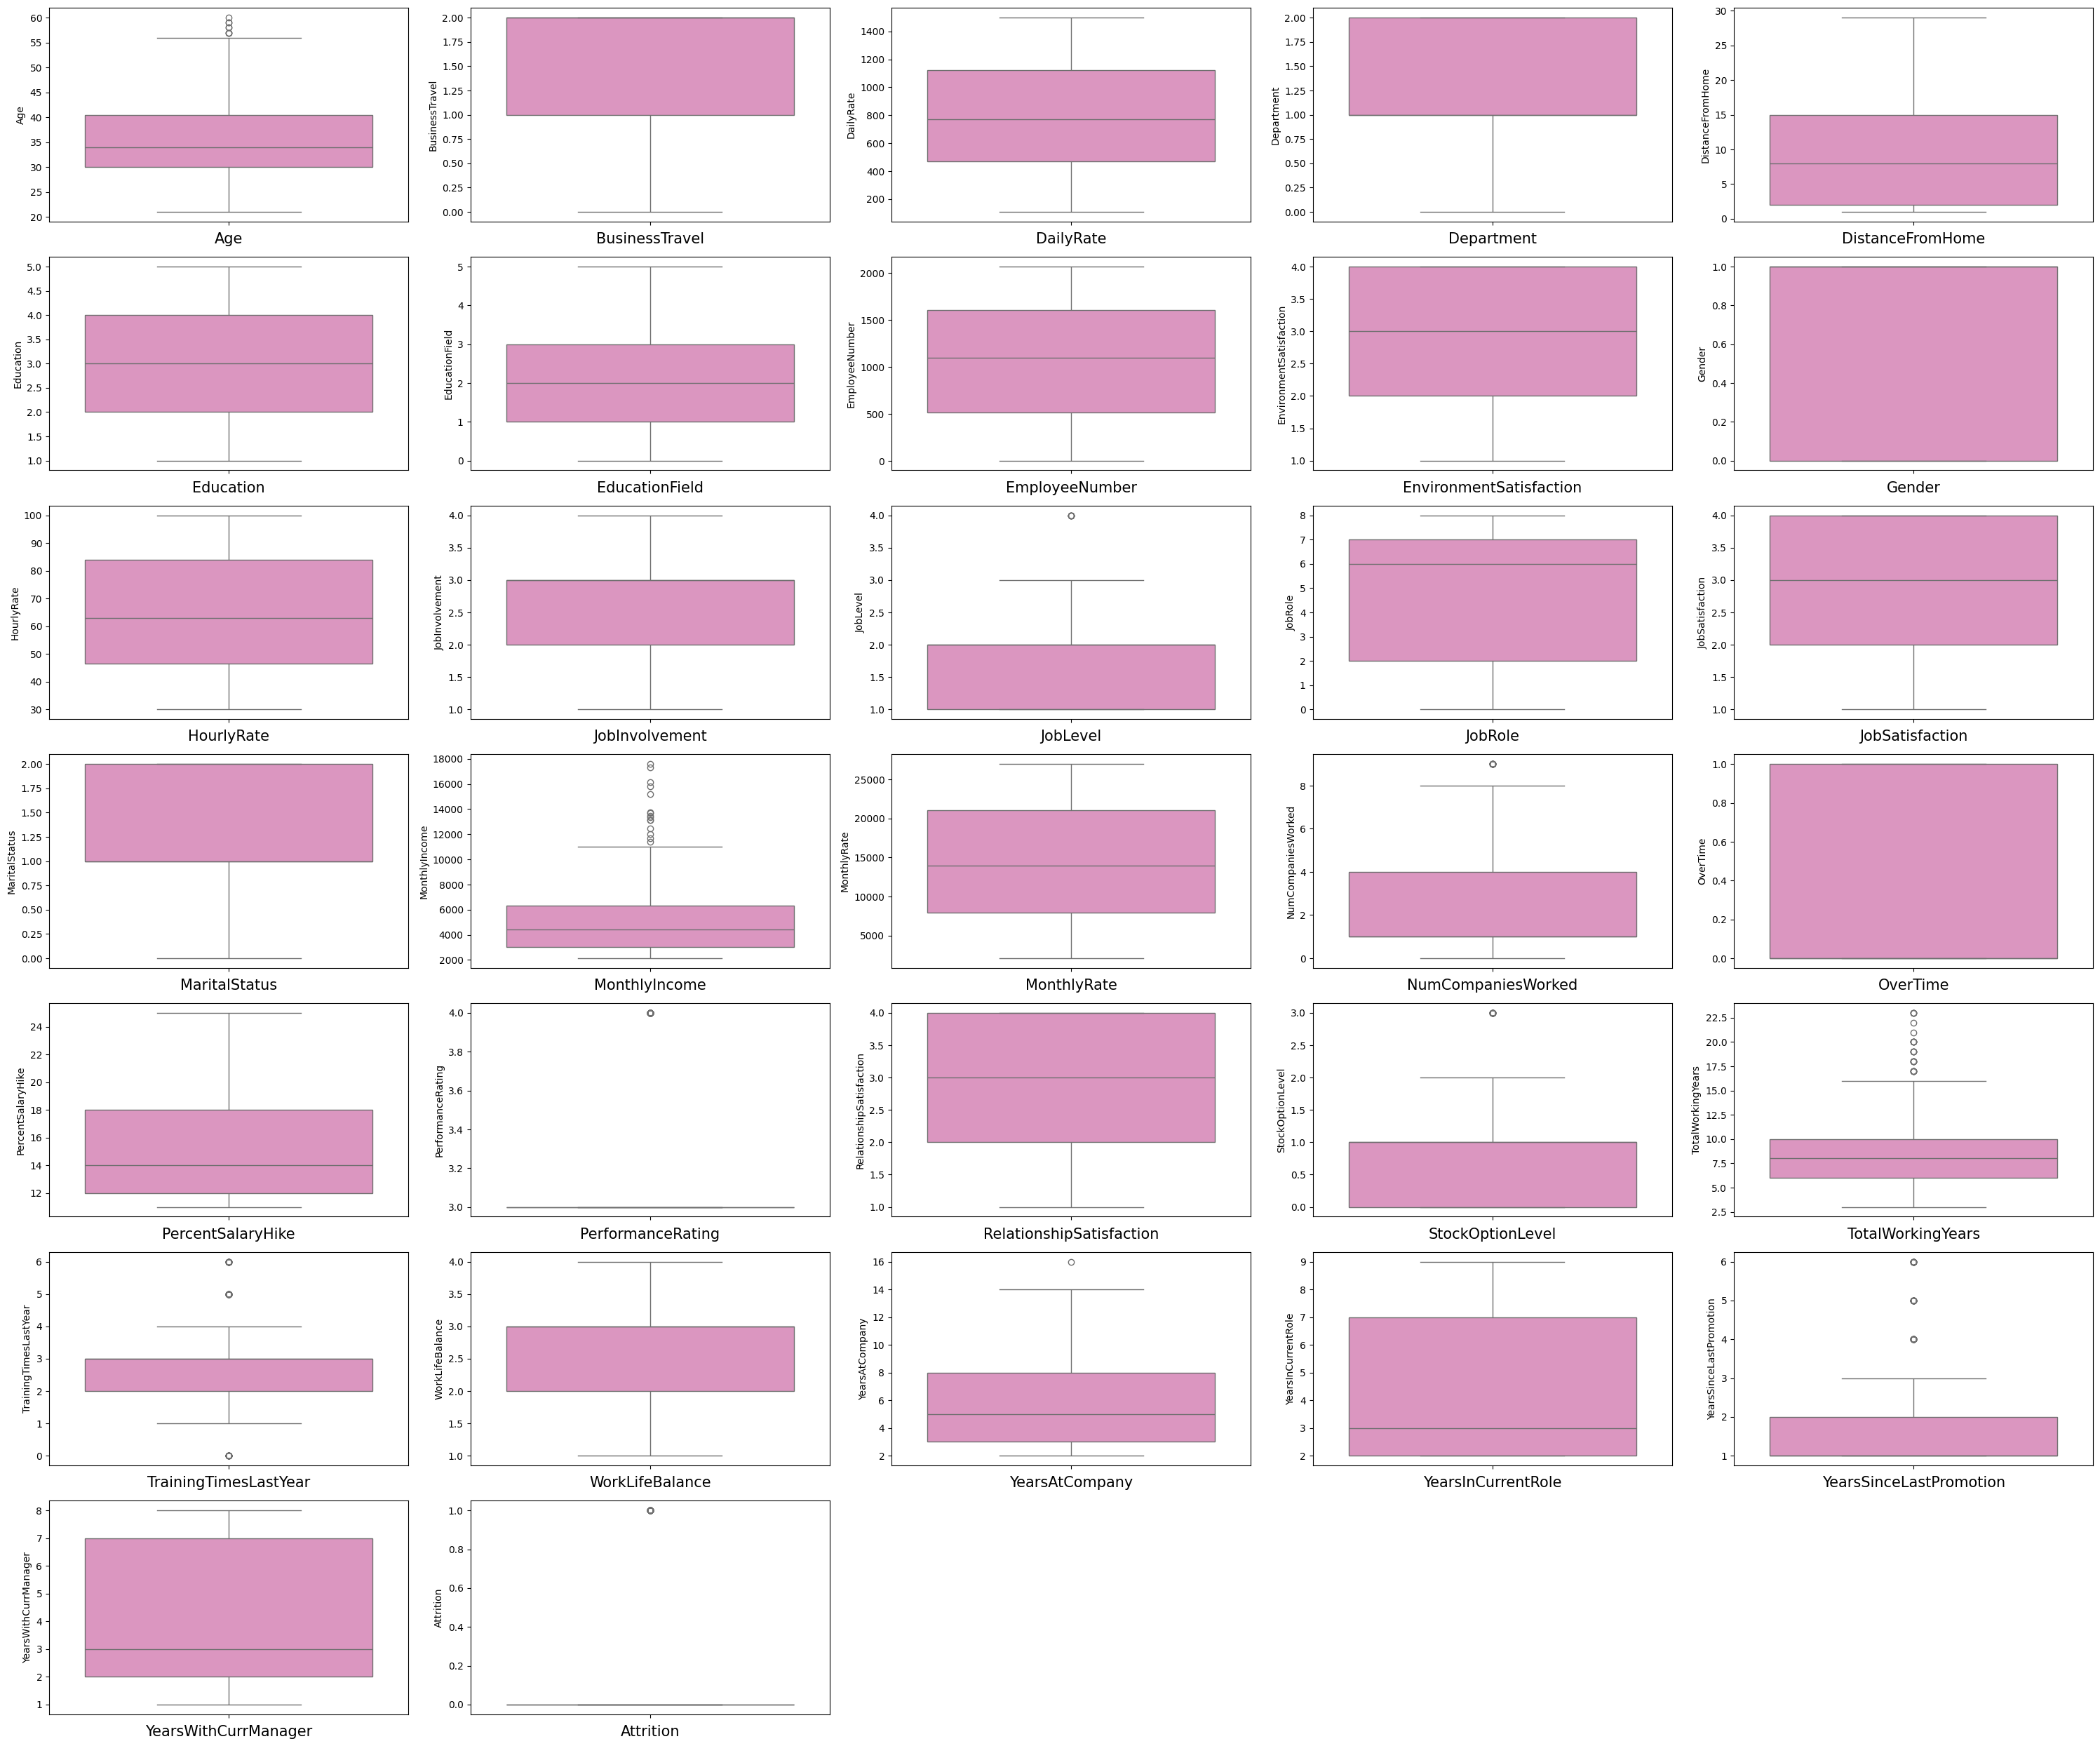

In [20]:
# Before removing outliers.
plt.figure(figsize=(30,25), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=35:
        ax = plt.subplot(7,5,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [21]:
df.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,...,423.000000,423.000000,423.00000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,35.579196,1.567376,786.825059,1.264775,9.539007,2.853428,2.281324,1054.938534,2.737589,0.619385,...,2.706856,0.803783,8.77305,2.777778,2.747045,5.598109,4.059102,1.933806,3.747045,0.130024
std,8.504125,0.688135,394.563293,0.525071,8.316475,1.056365,1.359121,611.154184,1.073013,0.486113,...,1.103259,0.869049,4.13980,1.272300,0.691749,2.904351,2.354547,1.392385,2.269692,0.336728
min,21.000000,0.000000,109.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,...,1.000000,0.000000,3.00000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
25%,30.000000,1.000000,468.000000,1.000000,2.000000,2.000000,1.000000,516.500000,2.000000,0.000000,...,2.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,34.000000,2.000000,771.000000,1.000000,8.000000,3.000000,2.000000,1094.000000,3.000000,1.000000,...,3.000000,1.000000,8.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,40.500000,2.000000,1125.000000,2.000000,15.000000,4.000000,3.000000,1607.000000,4.000000,1.000000,...,4.000000,1.000000,10.00000,3.000000,3.000000,8.000000,7.000000,2.000000,7.000000,0.000000
max,60.000000,2.000000,1498.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,...,4.000000,3.000000,23.00000,6.000000,4.000000,16.000000,9.000000,6.000000,8.000000,1.000000


In [22]:
# # Define the mapping
# mapping = {'yes': 1, 'no': 0}

# # Apply the mapping
# df['Attrition'] = df['Attrition'].map(mapping)

# Check for Skewness
#### Skewness can affect model performance and data distribution.

In [23]:
skewness = df.skew()
skewness = skewness[:-1]
skewness

Age                         0.714833
BusinessTravel             -1.296184
DailyRate                   0.045920
Department                  0.192961
DistanceFromHome            0.896002
Education                  -0.249645
EducationField              0.566820
EmployeeNumber             -0.056958
EnvironmentSatisfaction    -0.340851
Gender                     -0.493517
HourlyRate                  0.045995
JobInvolvement             -0.552236
JobLevel                    0.655865
JobRole                    -0.547973
JobSatisfaction            -0.363611
MaritalStatus              -0.204895
MonthlyIncome               1.581883
MonthlyRate                -0.002968
NumCompaniesWorked          1.011244
OverTime                    1.002426
PercentSalaryHike           0.751398
PerformanceRating           1.927586
RelationshipSatisfaction   -0.272378
StockOptionLevel            0.913443
TotalWorkingYears           1.046736
TrainingTimesLastYear       0.554962
WorkLifeBalance            -0.481295
Y

##### As we can observe, some of the parameters have values exceeding +0.5, such as DistanceFromHome, PercentSalaryHike etc. Additionally, other parameters have values exceeding 1, including PerformanceRating, MonthlyIncome, NumCompaniesWorked etc.

### Checking visualization presentation

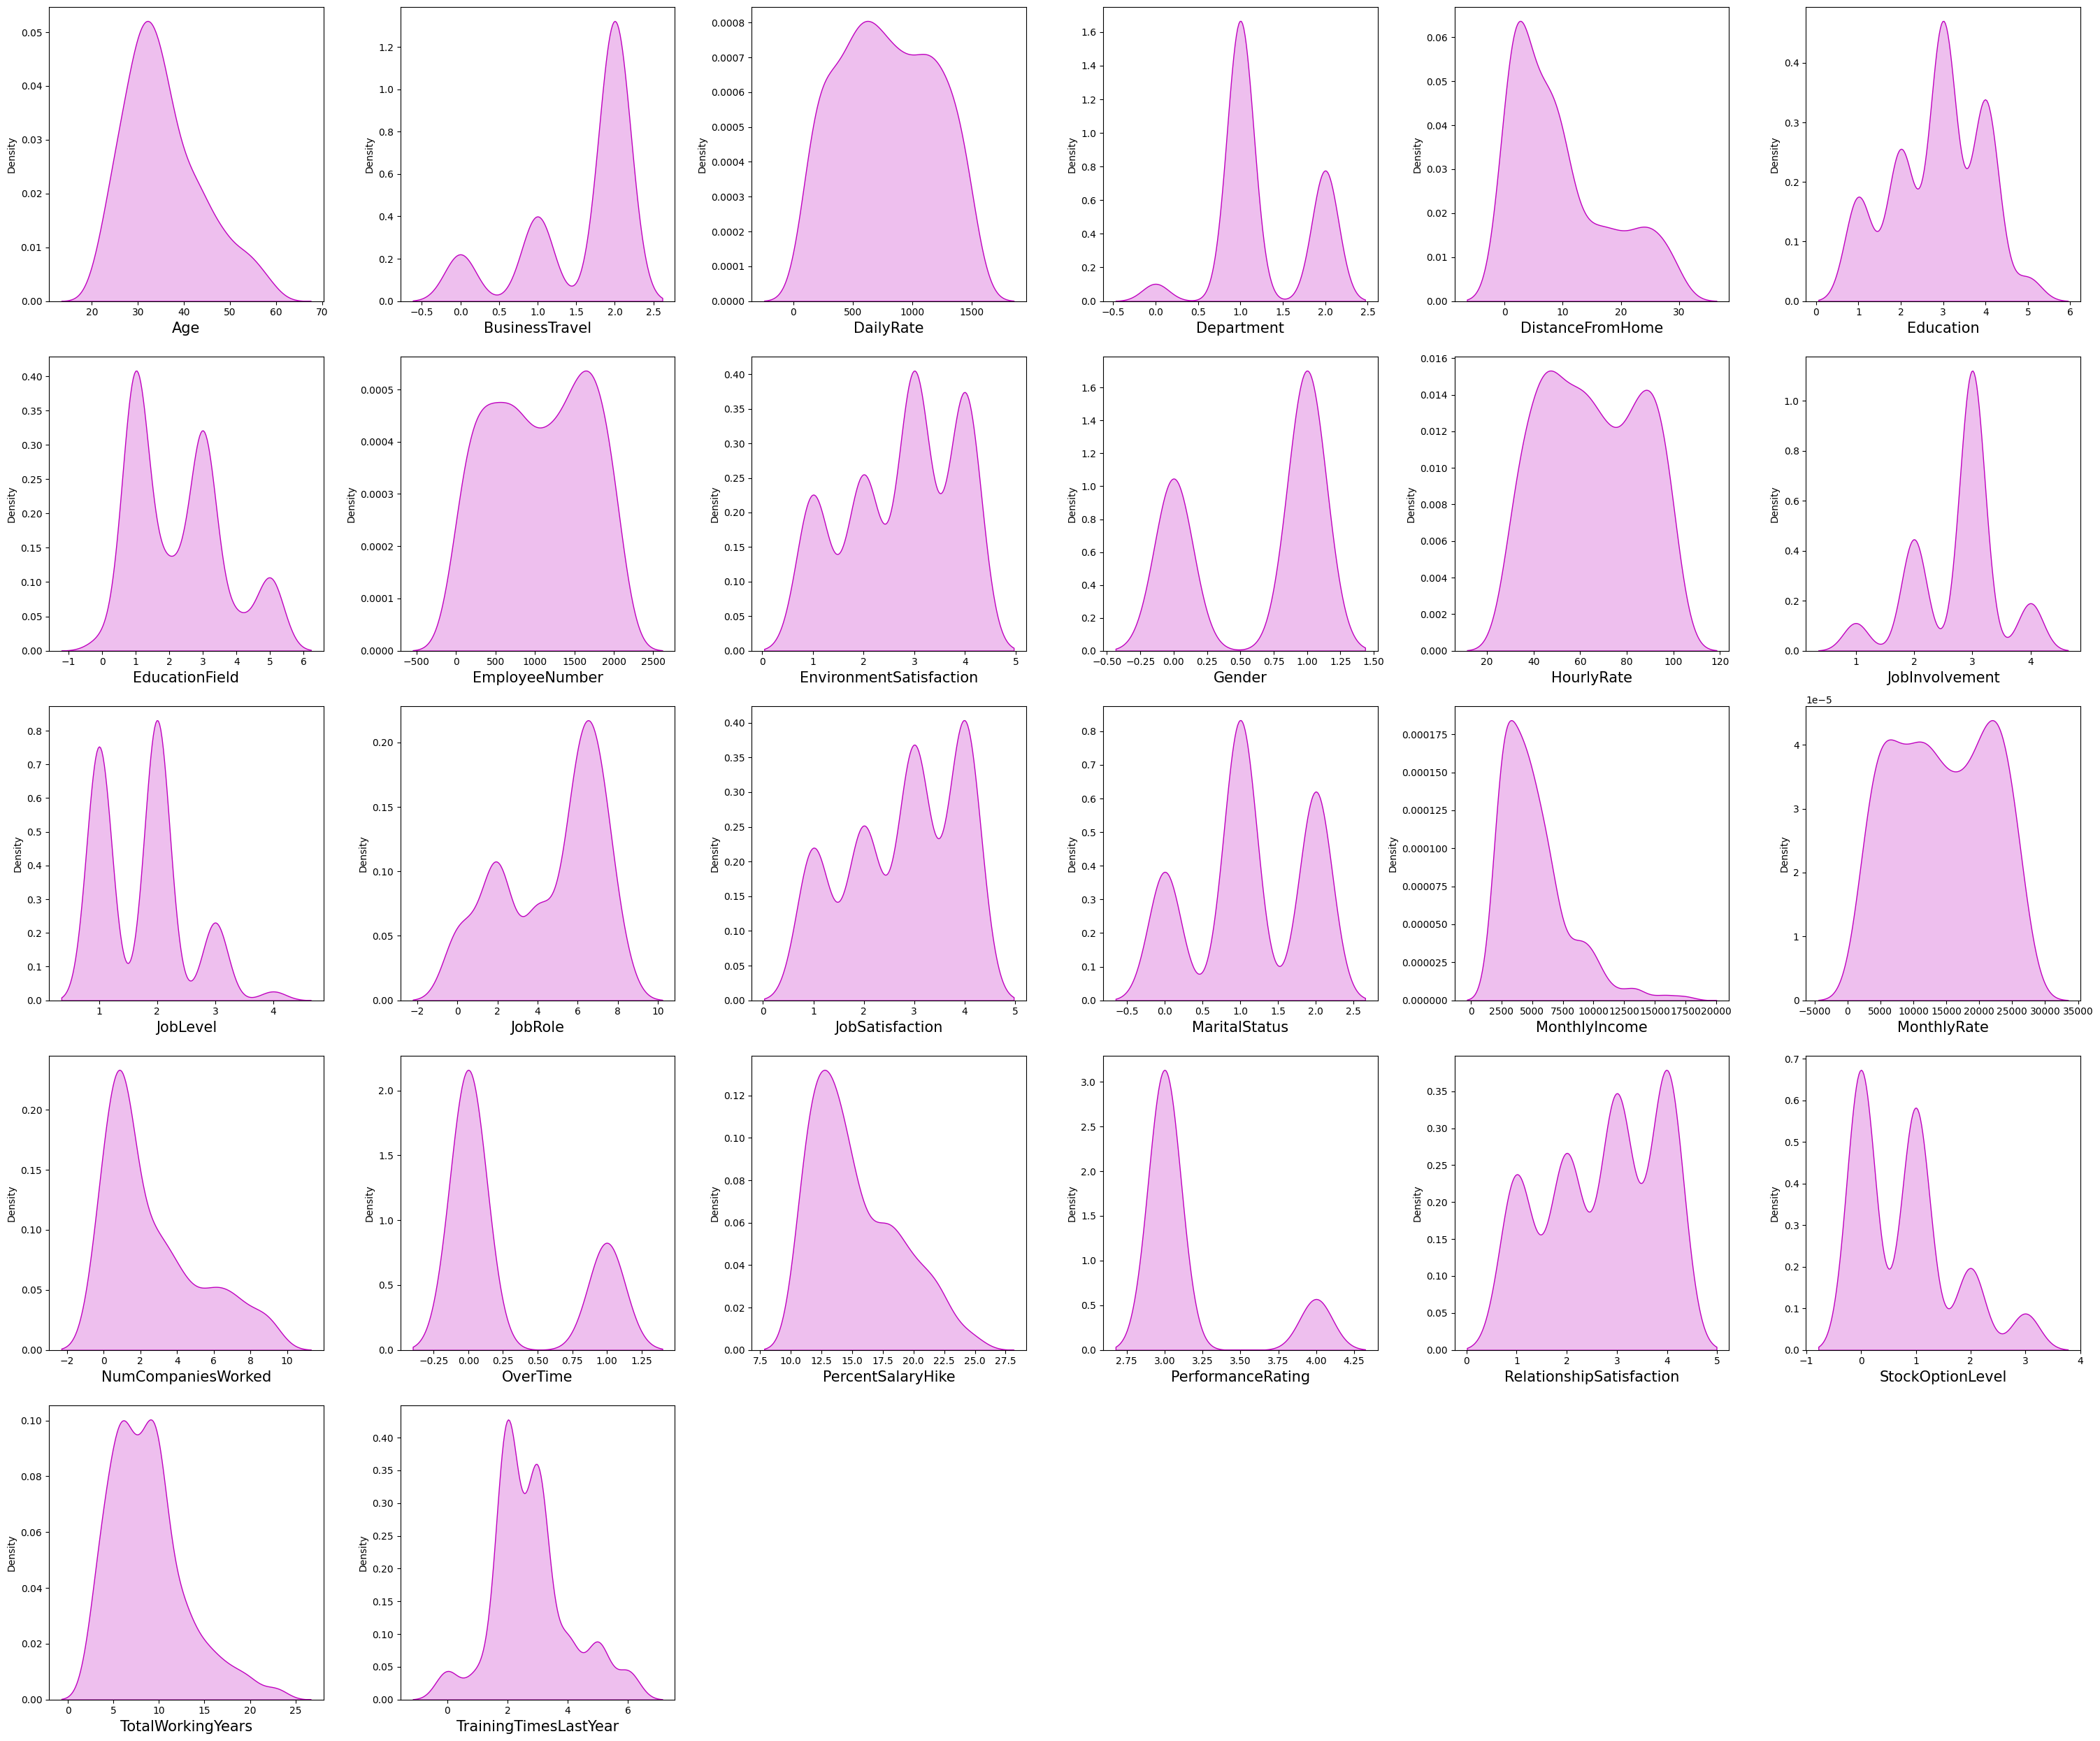

In [24]:
plt.figure(figsize=(30,25), facecolor='White')
plotnumber = 1
for col in df.select_dtypes(include=['float64', 'int64']):
    if plotnumber <=26:
        ax = plt.subplot(5,6,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Apply Transformation:

##### Use log transformation or other methods to correct skewness.

In [25]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer

# Loop through each column to check and correct skewness
for col in df.columns:
    skewness_col = skew(df[col])

    if skewness_col > 1 or skewness_col < -1:
        
        # Apply a Box-Cox transformation for high skewness if all values are positive
        if (df[col] > 0).all():
            pt = PowerTransformer(method='box-cox', standardize=False)
            df[col] = pt.fit_transform(df[col].values.reshape(-1, 1))
        else:
            # Apply Yeo-Johnson transformation for non-positive data
            pt = PowerTransformer(method='yeo-johnson', standardize=False)
            df[col] = pt.fit_transform(df[col].values.reshape(-1, 1))
    elif skewness_col > 0.5 or skewness_col < -0.5:
        # Apply a square root transformation for moderate skewness
        df[col] = df[col].apply(lambda x: np.sqrt(x) if x >= 0 else -np.sqrt(-x))


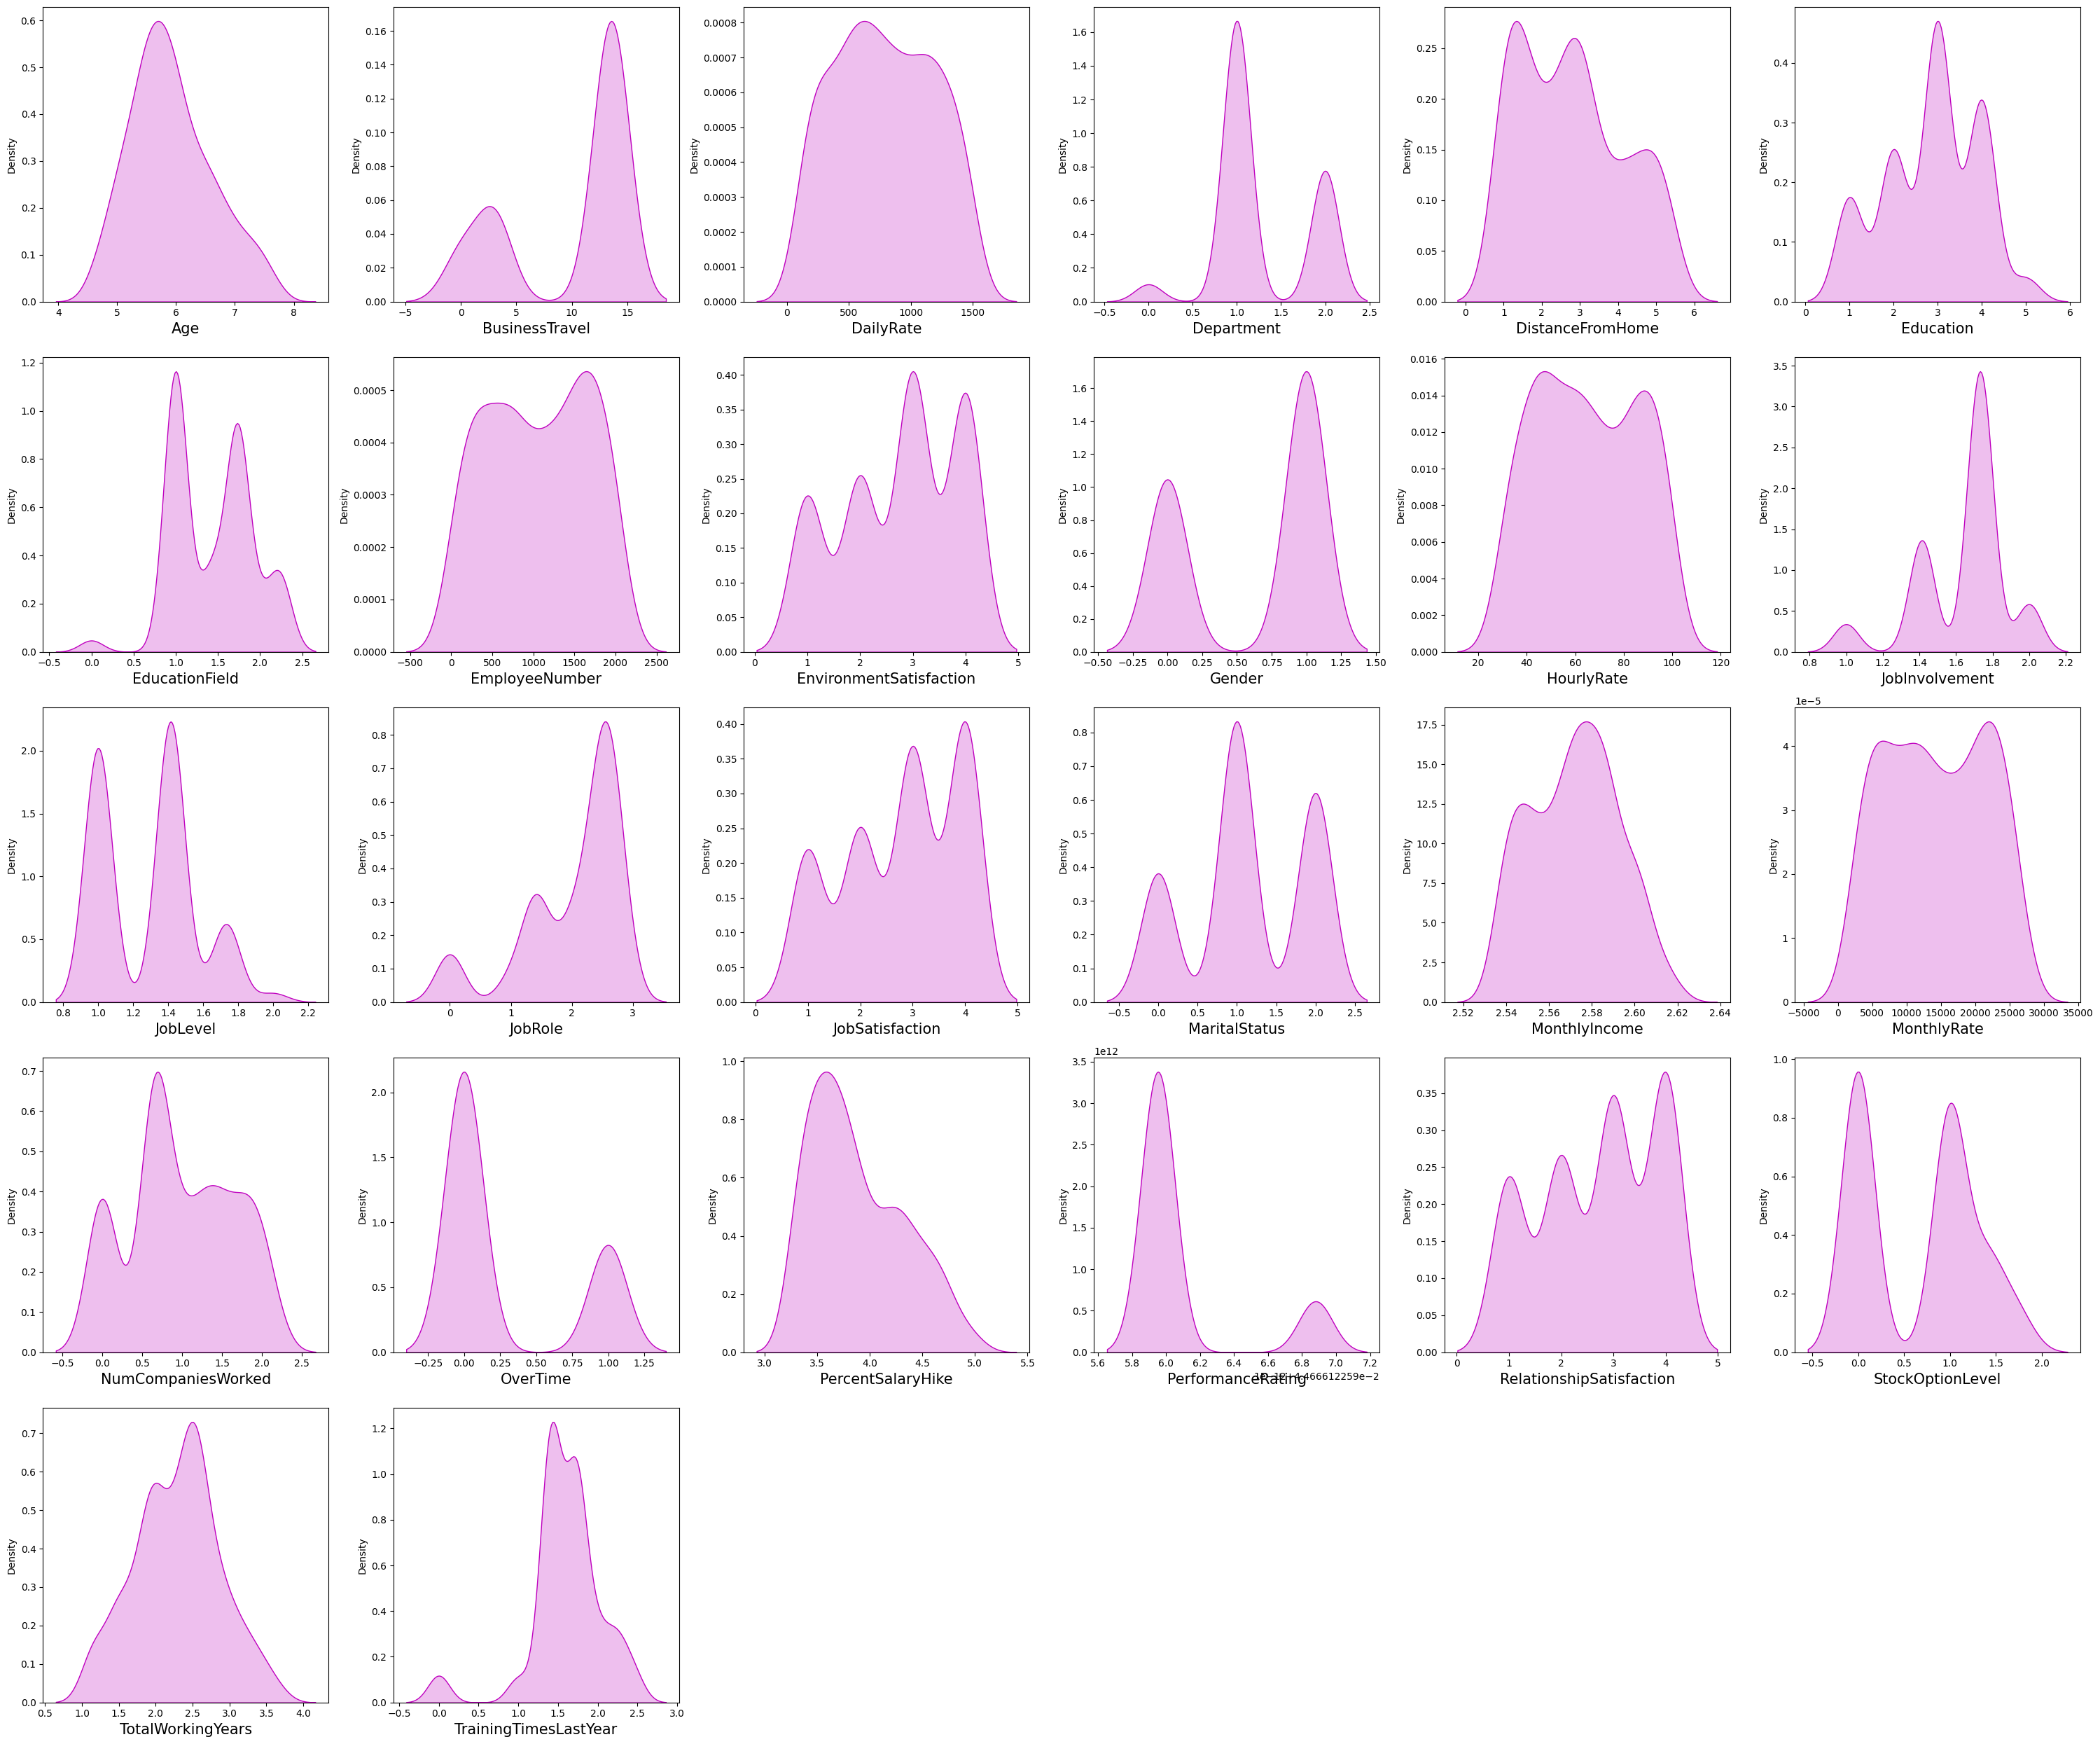

In [26]:
plt.figure(figsize=(30,25), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=26:
        ax = plt.subplot(5,6,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [27]:
# Now Correlation between target variable and independent variable.
cor = df.corr()
cor

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.003749,-0.044503,-0.036425,0.015402,0.251456,-0.081644,0.000963,0.064571,-0.026901,...,-0.001636,0.029635,0.536551,-0.014101,-0.021957,-0.013806,0.023628,0.084449,0.061850,-0.086724
BusinessTravel,0.003749,1.000000,0.028348,0.016904,0.017634,0.003334,-0.005378,-0.017625,0.032080,-0.021709,...,-0.041406,0.046379,0.003863,0.066082,-0.066202,-0.011501,0.024387,-0.005319,-0.048857,-0.061245
DailyRate,-0.044503,0.028348,1.000000,0.092518,-0.025744,0.012600,0.082808,-0.018957,-0.039535,0.028599,...,-0.023188,0.028037,-0.005501,0.020679,-0.064644,-0.033353,-0.010289,-0.021179,-0.021774,0.056854
Department,-0.036425,0.016904,0.092518,1.000000,0.075541,0.010322,0.104231,-0.019673,-0.078273,-0.031298,...,-0.033412,0.006231,-0.014828,0.052857,0.106545,-0.009272,0.044154,0.025330,-0.025935,0.086278
DistanceFromHome,0.015402,0.017634,-0.025744,0.075541,1.000000,-0.027028,0.014536,-0.027722,-0.023701,0.011961,...,-0.010236,0.045422,0.049018,0.009464,0.033393,0.003768,0.015228,0.016068,0.048434,0.011570
Education,0.251456,0.003334,0.012600,0.010322,-0.027028,1.000000,-0.012860,0.019869,0.103966,-0.035062,...,-0.026788,0.084246,0.156329,-0.067208,0.043184,-0.006945,0.007211,0.060188,-0.009626,-0.052885
EducationField,-0.081644,-0.005378,0.082808,0.104231,0.014536,-0.012860,1.000000,0.040764,0.042094,0.026704,...,-0.024815,-0.035635,-0.046297,0.042305,0.132427,-0.032738,-0.027940,-0.063185,-0.039309,0.077935
EmployeeNumber,0.000963,-0.017625,-0.018957,-0.019673,-0.027722,0.019869,0.040764,1.000000,-0.046610,0.071835,...,-0.092689,0.026686,0.019192,-0.025304,0.013528,0.014112,-0.018012,-0.011426,-0.038017,-0.010209
EnvironmentSatisfaction,0.064571,0.032080,-0.039535,-0.078273,-0.023701,0.103966,0.042094,-0.046610,1.000000,-0.032929,...,0.000923,0.033113,0.021609,-0.020770,-0.006634,0.054841,0.062348,-0.036891,0.045644,-0.115215
Gender,-0.026901,-0.021709,0.028599,-0.031298,0.011961,-0.035062,0.026704,0.071835,-0.032929,1.000000,...,0.043318,-0.012744,-0.006197,-0.073026,0.008979,-0.057212,-0.000414,-0.003250,-0.028784,0.027995


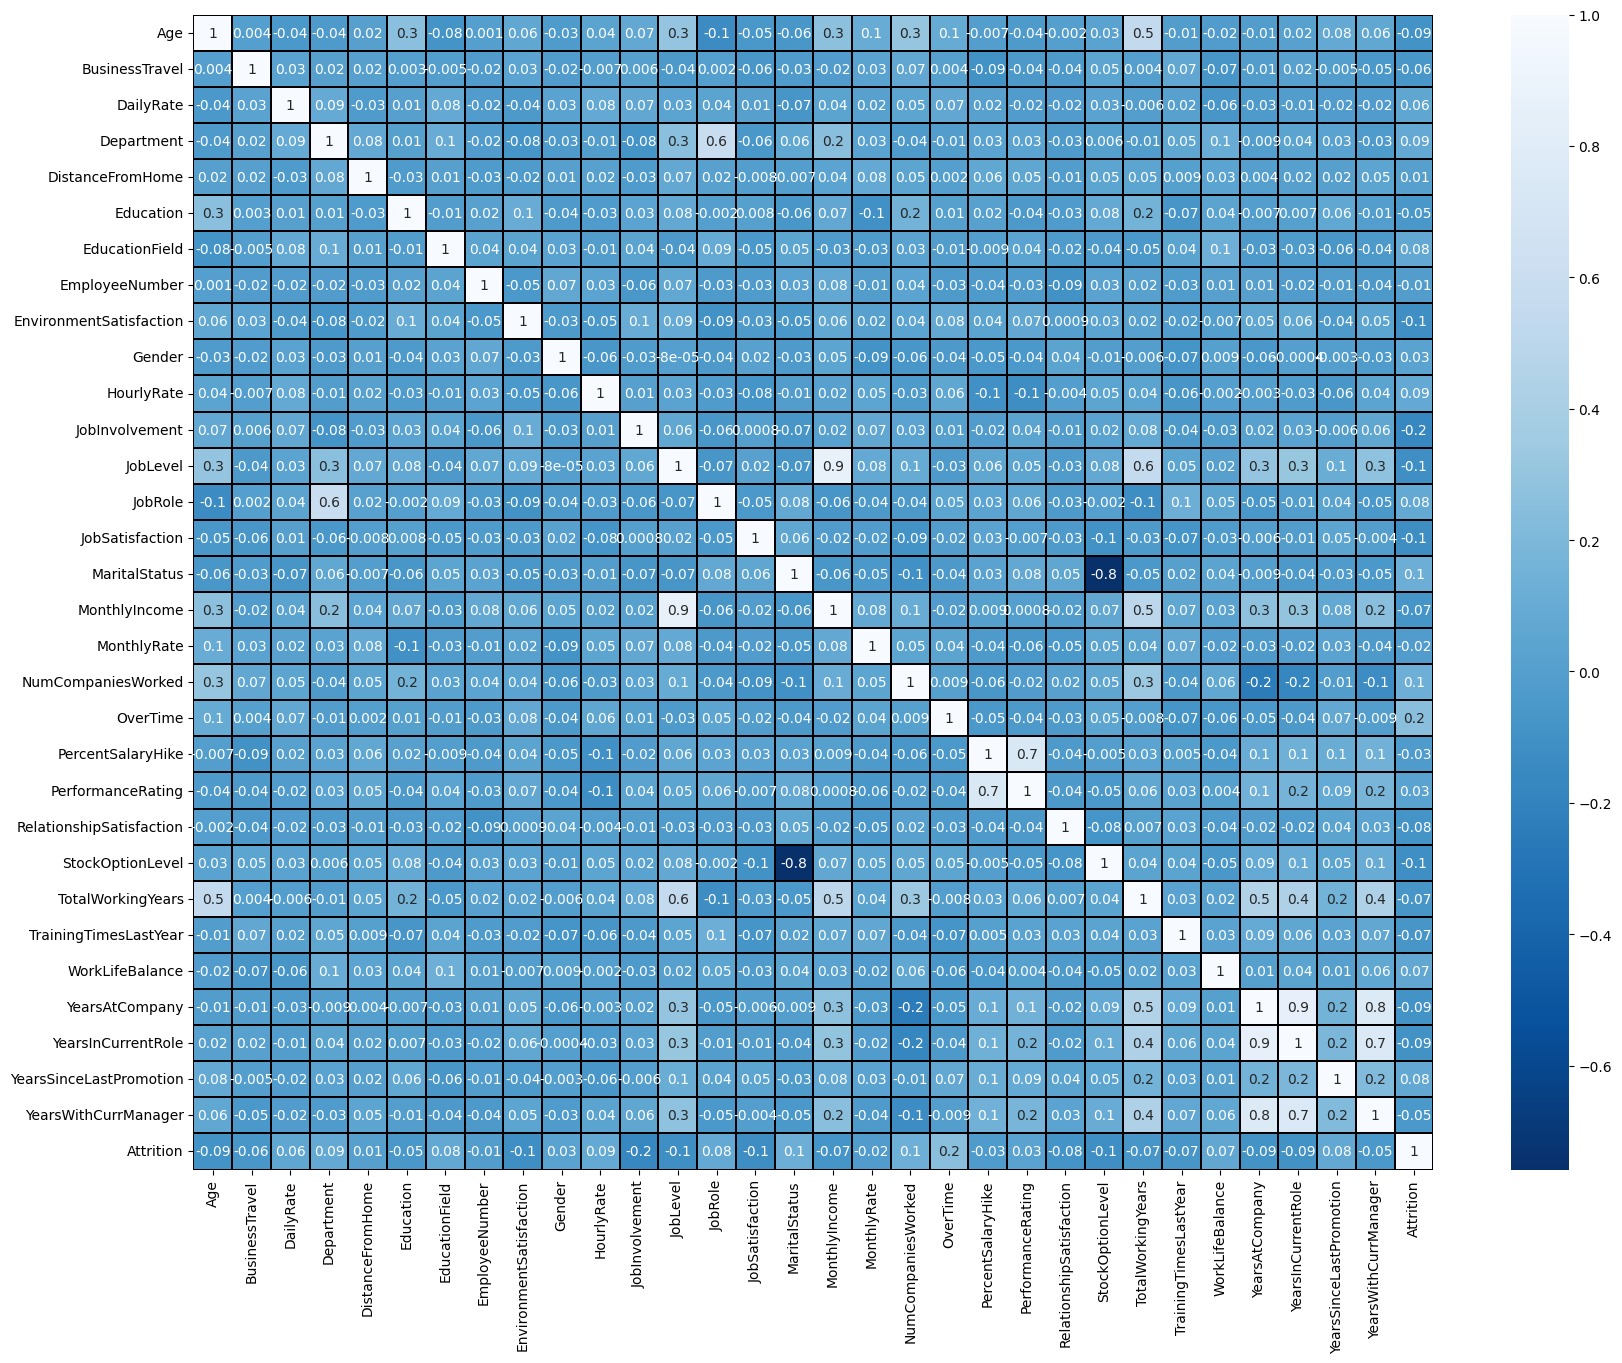

In [28]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation = 0)

plt.show()

In [29]:
# There is not much positive correlation between the target and features.
# As we can see fixed acidity and volatile acidity are in hightly negative correlation
# We observe a negative correlation between pH and fixed acidity. Additionally, two independent features, volatile acidity 
# and citric acid, are highly correlated.

#### When two independent features are highly correlated, we can drop one of the columns.

In [30]:
# We can clearly see that there is no positive correlation with the target value,
# but there is a highly negative correlation with the target value.
cor['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.248078
NumCompaniesWorked          0.134459
MaritalStatus               0.124150
Department                  0.086278
HourlyRate                  0.085614
JobRole                     0.083913
EducationField              0.077935
YearsSinceLastPromotion     0.075948
WorkLifeBalance             0.070323
DailyRate                   0.056854
PerformanceRating           0.030177
Gender                      0.027995
DistanceFromHome            0.011570
EmployeeNumber             -0.010209
MonthlyRate                -0.017989
PercentSalaryHike          -0.026989
YearsWithCurrManager       -0.046943
Education                  -0.052885
BusinessTravel             -0.061245
TotalWorkingYears          -0.065567
TrainingTimesLastYear      -0.066045
MonthlyIncome              -0.073661
RelationshipSatisfaction   -0.082139
Age                        -0.086724
YearsAtCompany             -0.087304
YearsInCurrentRole         -0.093748
E

In [31]:
# Separating feature and label
x = df.drop('Attrition', axis=1)
y = df['Attrition']
y

1      -0.0
4      -0.0
5      -0.0
8      -0.0
12     -0.0
       ... 
1455   -0.0
1458   -0.0
1463   -0.0
1466   -0.0
1469   -0.0
Name: Attrition, Length: 423, dtype: float64

In [32]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [33]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature Values'] = x.columns

In [34]:
vif
# So, we can clearly see that there is moderate multicollinearity present, so we don't need to drop any columns.

,VIF Values,Feature Values
0,1.733748,Age
1,1.054127,BusinessTravel
2,1.070198,DailyRate
3,1.911638,Department
4,1.041201,DistanceFromHome
5,1.146947,Education
6,1.067534,EducationField
7,1.056658,EmployeeNumber
8,1.087444,EnvironmentSatisfaction
9,1.081080,Gender


### We can see that there is class imbalance in the target values, so we need to address it by using an oversampling method.

### OverSampling

In [35]:
# Define the mapping
yes = 0.090409
no = 0
mapping = {yes: 'yes', no: 'no'}

# Apply the mapping
y_mapped = y.map(mapping)

# Apply the mapping with handling for unexpected values
y_mapped = y.map(mapping).fillna('yes')  # Replace NaNs with default category
y_mapped.unique()

array(['no', 'yes'], dtype=object)

In [36]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x,y_mapped)

In [37]:
# Checking again
y_mapped.value_counts()

Attrition
no     368
yes     55
Name: count, dtype: int64

In [38]:
# We have resolved the class imbalance issue by using oversampling method.
y1.value_counts()

Attrition
no     368
yes    368
Name: count, dtype: int64

### Modelling

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    RER = RandomForestClassifier()
    RER.fit(x_train, y_train)
    pred = RER.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRs = i
print("Best Accuracy is ", maxAcc, "at random_state ", maxRs)

Best Accuracy is  0.995475113122172 at random_state  15


In [40]:
# Creating train test split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=.30, random_state=maxRs)

In [41]:
# Classification Algorithmfrom 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [42]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)

In [43]:
print("Accuracy of this model ", accuracy_score(y_test, predRFC)*100)

print(confusion_matrix(y_test, predRFC))

print(classification_report(y_test, predRFC))

Accuracy of this model  99.5475113122172
[[103   1]
 [  0 117]]
              precision    recall  f1-score   support

          no       1.00      0.99      1.00       104
         yes       0.99      1.00      1.00       117

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



# ExtraTreesClassifier

In [44]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predET)*100)

print(confusion_matrix(y_test, predET))

print(classification_report(y_test, predET))

Accuracy of this model  99.5475113122172
[[103   1]
 [  0 117]]
              precision    recall  f1-score   support

          no       1.00      0.99      1.00       104
         yes       0.99      1.00      1.00       117

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



# GradientBoostingClassifier

In [45]:
# Checking accuracy for GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predGBC)*100)

print(confusion_matrix(y_test, predGBC))

print(classification_report(y_test, predGBC))

Accuracy of this model  97.73755656108597
[[101   3]
 [  2 115]]
              precision    recall  f1-score   support

          no       0.98      0.97      0.98       104
         yes       0.97      0.98      0.98       117

    accuracy                           0.98       221
   macro avg       0.98      0.98      0.98       221
weighted avg       0.98      0.98      0.98       221



# BaggingClassifier

In [46]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predBC)*100)

print(confusion_matrix(y_test, predBC))

print(classification_report(y_test, predBC))

Accuracy of this model  93.66515837104072
[[ 97   7]
 [  7 110]]
              precision    recall  f1-score   support

          no       0.93      0.93      0.93       104
         yes       0.94      0.94      0.94       117

    accuracy                           0.94       221
   macro avg       0.94      0.94      0.94       221
weighted avg       0.94      0.94      0.94       221



# LogisticRegression

In [47]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predLR)*100)

print(confusion_matrix(y_test, predLR))

print(classification_report(y_test, predLR))

Accuracy of this model  80.99547511312217
[[ 79  25]
 [ 17 100]]
              precision    recall  f1-score   support

          no       0.82      0.76      0.79       104
         yes       0.80      0.85      0.83       117

    accuracy                           0.81       221
   macro avg       0.81      0.81      0.81       221
weighted avg       0.81      0.81      0.81       221



# SVC

In [48]:
# Checking accuracy for SVC
SV = SVC()
SV.fit(x_train, y_train)
predSV = SV.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predSV)*100)

print(confusion_matrix(y_test, predSV))

print(classification_report(y_test, predSV))

Accuracy of this model  96.83257918552036
[[ 97   7]
 [  0 117]]
              precision    recall  f1-score   support

          no       1.00      0.93      0.97       104
         yes       0.94      1.00      0.97       117

    accuracy                           0.97       221
   macro avg       0.97      0.97      0.97       221
weighted avg       0.97      0.97      0.97       221



In [49]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(RFC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predRFC) - score.mean()

[0.87162162 0.97278912 1.         0.98639456 0.99319728]
0.9648005148005148


0.030674598321657198

In [50]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(ET, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predET) - score.mean()

[0.96621622 0.97959184 1.         0.99319728 0.98639456]
0.9850799779371208


0.010395135185051196

In [51]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(GBC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predGBC) - score.mean()

[0.75       0.89115646 0.84353741 0.9047619  0.85714286]
0.8493197278911564


0.1280558377197033

In [52]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(BC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predBC) - score.mean()

[0.77702703 0.92517007 0.89115646 0.97278912 0.97959184]
0.9091469020040448


0.027504681706362444

In [53]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(LR, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predLR) - score.mean()

[0.65540541 0.78231293 0.74829932 0.79591837 0.76190476]
0.7487681559110131


0.06118659522020864

In [54]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(SV, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predSV) - score.mean()

[0.91216216 0.95238095 0.96598639 0.95918367 0.95238095]
0.9484188269902555


0.01990696486494814

# As you can see our best model is Extra Tree Classifier is the best.

In [55]:
# Hyper Parameter Turning
# Extree Classifier
from sklearn.model_selection import GridSearchCV
parameter = {
    'criterion' : ['gini', 'entropy'],
    'random_state' : [10, 50, 1000],
    'max_depth' : [0, 10, 20],
    'n_jobs' : [-2, -1, 1],
    'n_estimators' : [50, 100, 200, 300]
}
GCV = GridSearchCV(ExtraTreesClassifier(), parameter, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [56]:
Final_model = ExtraTreesClassifier(criterion='entropy', max_depth=10, n_estimators= 100, n_jobs=-2, random_state=50)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
acc

1.0

###### The ExtraTreesClassifier was chosen for its best cross-validation performance, effective balance of bias and variance, and useful feature importance insights. It is saved for production as hr_analytics_project.pkl.

In [57]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model, 'hr_analytics_project.pkl')

['hr_analytics_project.pkl']

In [58]:
# Predicting the saved model
model = joblib.load('hr_analytics_project.pkl')
prediction = model.predict(x_test)

In [59]:
# Confirming
a = np.array(y_test)
df = pd.DataFrame()
df['Predict'] = prediction
df['Original'] = a
df

,Predict,Original
0,yes,yes
1,yes,yes
2,yes,yes
3,yes,yes
4,yes,yes
...,...,...
216,no,no
217,yes,yes
218,no,no
219,no,no
